In [1]:
import matplotlib as mpl

# update matplotlibrc
mpl.rcParams["font.family"] = "Open Sans"

In [2]:
# Needed to delete the fontlist*.json for matplotlib to update font cache
print(mpl.get_cachedir())

/Users/KTUN/.matplotlib


In [3]:
import matplotlib.pyplot as plt
import os
import numpy as np
import scipy as sp
import pandas as pd
from scipy import stats

COLORS = plt.rcParams['axes.prop_cycle'].by_key()['color']

%matplotlib inline

In [4]:
np.random.seed(42)
rng = np.random.default_rng(42)

In [5]:
import random

random.gauss(0, 1)

1.3388713315031375

In [6]:
SAVE_DIR = os.path.join("..", "presentation", "figures")

# Knut's figures

In [7]:
rv = stats.lognorm(s=1, loc=1.5, scale=2.5)
x = np.linspace(0, rv.ppf(0.99), 2**10)
mode = x[np.argmax(rv.pdf(x))]
print(f"Mode={mode}  P50={rv.ppf(0.5)}  Mean={rv.mean()}")
print(f"P10={rv.ppf(0.1)}  P50={rv.ppf(0.5)}  P90={rv.ppf(0.9)}")

Mode=2.4107602705874975  P50=4.0  Mean=5.621803176750321
P10=2.1940156046300245  P50=4.0  P90=10.505561198197894


In [12]:
max(x)
rv.ppf(0.99)


findfont: Font family 'Open Sans' not found.
findfont: Font family 'Open Sans' not found.
findfont: Font family 'Open Sans' not found.
findfont: Font family 'Open Sans' not found.
findfont: Font family 'Open Sans' not found.
findfont: Font family 'Open Sans' not found.
findfont: Font family 'Open Sans' not found.
findfont: Font family 'Open Sans' not found.
findfont: Font family 'Open Sans' not found.
findfont: Font family 'Open Sans' not found.
findfont: Font family 'Open Sans' not found.
findfont: Font family 'Open Sans' not found.
findfont: Font family 'Open Sans' not found.
findfont: Font family 'Open Sans' not found.
findfont: Font family 'Open Sans' not found.
findfont: Font family 'Open Sans' not found.
findfont: Font family 'Open Sans' not found.
findfont: Font family 'Open Sans' not found.
findfont: Font family 'Open Sans' not found.
findfont: Font family 'Open Sans' not found.
findfont: Font family 'Open Sans' not found.
findfont: Font family 'Open Sans' not found.
findfont: 

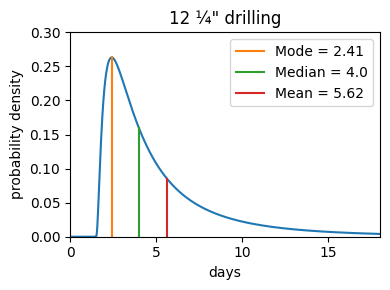

In [13]:
fig, ax = plt.subplots(1, 1, figsize=(4, 3))

ax.set_title('12 ¼" drilling')
ax.plot(x, rv.pdf(x))
ax.set_xlim([0, 18])
ax.set_ylim([0, 0.3])
ax.set_xlabel("days")
ax.set_ylabel("probability density")

mode = x[np.argmax(rv.pdf(x))]
plt.plot([mode, mode], [0, rv.pdf(mode)], label=f"Mode = {np.round(mode, 2)}")
plt.plot([rv.ppf(0.5), rv.ppf(0.5)], [0, rv.pdf(rv.ppf(0.5))], label=f"Median = {rv.ppf(0.5)}")
plt.plot([rv.mean(), rv.mean()], [0, rv.pdf(rv.mean())], label=f"Mean = {np.round(rv.mean(), 2)}")
plt.legend()

fig.tight_layout()
fig.savefig(os.path.join(SAVE_DIR, "lognorm_pdf.pdf"))

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(4, 3))

ax.set_title('12 ¼" drilling')
ax.set_yticks([0.1, 0.5, 0.9, 1.0])
ax.plot(x, rv.cdf(x), linewidth=3)
ax.set_xlim([0, 18])
ax.set_ylim([0, 1])
ax.set_xlabel("days")
ax.set_ylabel("cumulative probability")

for  p in [0.1, 0.5, 0.9]:
    plt.arrow(0, p, rv.ppf(p), 0, length_includes_head=True, head_width=0.04, head_length=0.5, zorder=10)
    plt.plot([rv.ppf(p), rv.ppf(p)], [0, rv.cdf(rv.ppf(p))], label=f"P{int(p*100)} = {np.round(rv.ppf(p), 2)}")

plt.legend()

fig.tight_layout()
fig.savefig(os.path.join(SAVE_DIR, "lognorm_cdf.pdf"))

In [ ]:
names = ["Normal", "Lognormal", "Triangular"]
distributions = [
    stats.norm(2),
    stats.lognorm(s=0.55, loc=0, scale=3),
    stats.triang(loc=0, scale=2, c=0.3)
]

fig, axes = plt.subplots(1, 3, figsize=(8, 1.5))

for ax, rv, name in zip(axes, distributions, names):
    ax.set_title(name)
    x = np.linspace(rv.ppf(0.001), rv.ppf(0.999), 2**10)
    ax.plot(x, rv.pdf(x), c=COLORS[0])
    ax2 = ax.twinx()
    ax2.plot(x, rv.cdf(x), c=COLORS[1])
    
    ax.set_ylabel('PDF', color=COLORS[0])
    ax2.set_ylabel('CDF', color=COLORS[1])

fig.tight_layout()
fig.savefig(os.path.join(SAVE_DIR, "pdfs_cdfs.pdf"))

In [ ]:
# Add uniform distributions

from matplotlib.path import Path
from matplotlib.patches import PathPatch

names = ["X", "Y", "Z"]

fig, axs = plt.subplots(1, 3, figsize=(8, 2), sharex=True, sharey=True)

for ax, name in zip(axs, names):
    ax.set_ylim([0, 1.3])
    ax.set_title(name)

axs[0].fill_between([1, 2], 0, 1, color=COLORS[0], edgecolor='black')
axs[1].fill_between([1, 2], 0, 1, color=COLORS[1], edgecolor='black' )

codes = [Path.MOVETO] + [Path.LINETO]*2 + [Path.CLOSEPOLY]
vertices = [(2, 0), (3, 1), (4, 0), (2, 0)]
axs[2].add_patch(PathPatch(Path(vertices, codes), facecolor=COLORS[2], edgecolor='black'))

fig.tight_layout()
fig.subplots_adjust(wspace=0.2)

fig.savefig(os.path.join(SAVE_DIR, "add_uniform.pdf"))

In [ ]:
# How I should have done it:
names = ["X", "Y", "Z"]
distributions = [
    stats.uniform(loc=1),
    stats.uniform(loc=1),
    stats.triang(loc=2, scale=2, c=0.5)
]

fig, axes = plt.subplots(1, 3, figsize=(8, 2), sharex=True, sharey=True)

for ax, rv, name, color in zip(axes, distributions, names, COLORS):
    ax.set_title(name)
    ax.set_ylim([0, 1.3])
    x = np.linspace(rv.ppf(0)-0.01, rv.ppf(1)+0.01, 2**10)
    ax.fill_between(x, np.zeros_like(x), rv.pdf(x), color=color, edgecolor='black' )
    
fig.tight_layout()

In [ ]:
uniform = stats.uniform(loc=1)
triangular = stats.triang(loc=2, scale=2, c=0.5) # Sum of two uniforms

print(uniform.ppf(0.1), triangular.ppf(0.1))
print(uniform.mean(), triangular.mean())
print(uniform.ppf(0.9), triangular.ppf(0.9))

In [ ]:
# Add uniform by sampling
names = ["X", "Y", "Z"]
distributions = [
    stats.uniform(loc=1),
    stats.uniform(loc=1),
    stats.triang(loc=2, scale=2, c=0.5)
]
samples = [
    stats.uniform(loc=1, scale=1).rvs(1000),
    stats.uniform(loc=1, scale=1).rvs(1000),
]
samples.append(samples[0]+samples[1])

N_DOTS=250

fig, axes = plt.subplots(1, 3, figsize=(8, 2), sharex=True, sharey=True)

for ax, rv, samples, name, color in zip(axes, distributions, samples, names, COLORS):
    ax.hist(samples, bins="fd", color=color, density=True)
    ax.scatter(
        samples[0:N_DOTS],
        stats.uniform().rvs(len(samples[0:N_DOTS]), random_state=1) * 0.3
        + 0.02,
        color="black",
        s=1,
    )
    ax.set_title(name)
    ax.set_ylim([0, 1.3])
    x = np.linspace(rv.ppf(0)-0.01, rv.ppf(1)+0.01, 2**10)
    ax.plot(x, rv.pdf(x), c="black")
    
    # Show percentiles
    display(
        pd.Series(samples, name="samples")
        .describe(percentiles=[0.1, 0.25, 0.5, 0.75, 0.9])
        .to_frame()
        .T
    )
    
fig.tight_layout()
fig.savefig(os.path.join(SAVE_DIR, "add_uniform_samples.pdf"))

# General figures

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(4, 3))

# Plot PDF
distribution = stats.uniform()
x = np.linspace(-0.05, 1.05, num=2**10)
ax.plot(x, distribution.pdf(x))
ax.set_ylim([0, 1.2])

fig.tight_layout()
fig.savefig(os.path.join(SAVE_DIR, "uniform.pdf"))

# Draw samples and plot them
samples = distribution.rvs(1000, random_state=4)

ax.scatter(
    samples,
    np.ones_like(samples) * stats.uniform().rvs(len(samples), random_state=1) * 0.2,
    color="black",
    s=1,
)

fig.savefig(os.path.join(SAVE_DIR, "uniform_samples.pdf"))

ax.hist(samples, bins="auto", density=True, zorder=0)

fig.savefig(os.path.join(SAVE_DIR, "uniform_samples_hist.pdf"))

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(4, 3))

# Plot PDF
distribution = stats.norm()
x = np.linspace(-4, 4, num=2**10)
ax.plot(x, distribution.pdf(x))
ax.set_ylim([0, 0.45])

fig.tight_layout()
fig.savefig(os.path.join(SAVE_DIR, "normal.pdf"))

# Draw samples and plot them
samples = distribution.rvs(1000, random_state=6)

ax.scatter(
    samples,
    np.ones_like(samples) * stats.uniform().rvs(len(samples), random_state=1) * 0.1,
    color="black",
    s=1,
)

fig.savefig(os.path.join(SAVE_DIR, "normal_samples.pdf"))

ax.hist(samples, bins="auto", density=True, zorder=0)

fig.savefig(os.path.join(SAVE_DIR, "normal_samples_hist.pdf"))

# Canonball

In [ ]:
# https://en.wikipedia.org/wiki/Projectile_motion
angle = np.deg2rad(45)
velocity = 10
g = 9.81

time_in_flight = 2 * velocity * np.sin(angle) / g

time = np.linspace(0, time_in_flight, num=2**5)

def x(t):
    return velocity * np.cos(angle) * t

def y(t):
    return velocity * np.sin(angle) * t - g * t**2 / 2

fig, ax = plt.subplots(1, 1, figsize=(5, 2))

ax.set_xlim([-0.15, 11.25])
ax.set_ylim([-0.15, 4])

ax.plot([x(t_i) for t_i in time], [y(t_i) for t_i in time])
ax.arrow(0, 0, np.cos(angle) * velocity/5, np.sin(angle) * velocity / 5,
        head_width=0.3, head_length=0.3, overhang=0.8, zorder=99)

fig.tight_layout()
fig.savefig(os.path.join(SAVE_DIR, "cannonball.pdf"))

In [ ]:
def final_x(angle, velocity):
    time_in_flight = 2 * velocity * np.sin(angle) / g
    return x(time_in_flight)

fig, ax = plt.subplots(1, 1, figsize=(5, 2))

ax.set_xlim([-0.15, 11.25])
ax.set_ylim([-0.15, 4])

RELATIVE_ERROR_ANGLE = 0.15

np.random.seed(1)
random.seed(1)

for iteration in range(99):
    angle = np.deg2rad(random.gauss(45, RELATIVE_ERROR_ANGLE * 45))
    velocity = random.gauss(10, 0.01 * 10)
    
    ax.arrow(0, 0, np.cos(angle) * velocity/5, np.sin(angle) * velocity / 5,
        head_width=0.3, head_length=0.3, overhang=0.8, zorder=99, alpha=0.1)
    
    time_in_flight = 2 * velocity * np.sin(angle) / g
    time = np.linspace(0, time_in_flight, num=2**5)
    ax.plot([x(t_i) for t_i in time], [y(t_i) for t_i in time], color=COLORS[0], alpha=0.1)
    
    
# Plot histogram of final values
final_x_values = []

for iteration in range(99999):
    angle = np.deg2rad(random.gauss(45, RELATIVE_ERROR_ANGLE * 45))
    velocity = random.gauss(10, 0.01 * 10)
    final_x_values.append(final_x(angle, velocity))
    

(counts, bins) = np.histogram(final_x_values, bins=100)

factor = 0.00048 # Factor to scale the histogram for a nice figure
ax.hist(bins[:-1], bins=bins, weights=factor*counts, color=COLORS[1], zorder=99, alpha=0.8)

fig.tight_layout()
fig.savefig(os.path.join(SAVE_DIR, "cannonball_sim1.pdf"))

# Mutual fund saving

In [ ]:
def simulate(years, yearly, interest):
    yield (saved := 0)
    for year in range(years):
        saved = saved * interest + yearly
        yield saved


years = 18
yearly = 12
interest = 1.05

list(simulate(years, yearly, interest))

In [ ]:
import random


def simulate_rng(years, yearly, interest):
    yield (saved := 0)
    for year in range(years):
        saved = saved * random.gauss(*interest) + yearly
        yield saved


years = 18
yearly = 12
interest = (1.05, 0.1)

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(3, 9 / 4))

ax.plot(list(simulate(years, yearly, interest[0])), zorder=99, lw=3)
ax.set_xticks(np.arange(0, years + 1, 2))
ax.grid(True, ls="--", alpha=0.5, zorder=0)
ax.set_xlabel("Years")
ax.set_ylabel("Money")
ax.set_ylim([0, 500])
ax.set_xlim([0, 18])

fig.tight_layout()
fig.savefig(os.path.join(SAVE_DIR, "mutual_fund.pdf"))

for simulation in range(99):
    ax.plot(
        list(simulate_rng(years, yearly, interest)), color="black", alpha=0.1, zorder=9
    )

fig.savefig(os.path.join(SAVE_DIR, "mutual_fund_simulations.pdf"))

# Groceries

In [ ]:
import pandas as pd

In [ ]:
money_per_day = pd.Series(
    [
        0.0,
        0.0,
        471.9,
        784.22,
        0.0,
        355.29,
        0.0,
        600.76,
        399.7,
        0.0,
        266.7,
        238.6,
        433.0,
        0.0,
        1214.8,
        470.5,
        0.0,
        0.0,
        306.4,
        341.8,
        0.0,
        0.0,
        0.0,
        358.89,
        0.0,
        715.2,
        1049.02,
        0.0,
        0.0,
        536.7,
        367.7,
    ],
    index=pd.DatetimeIndex(
        [
            "2023-05-01",
            "2023-05-02",
            "2023-05-03",
            "2023-05-04",
            "2023-05-05",
            "2023-05-06",
            "2023-05-07",
            "2023-05-08",
            "2023-05-09",
            "2023-05-10",
            "2023-05-11",
            "2023-05-12",
            "2023-05-13",
            "2023-05-14",
            "2023-05-15",
            "2023-05-16",
            "2023-05-17",
            "2023-05-18",
            "2023-05-19",
            "2023-05-20",
            "2023-05-21",
            "2023-05-22",
            "2023-05-23",
            "2023-05-24",
            "2023-05-25",
            "2023-05-26",
            "2023-05-27",
            "2023-05-28",
            "2023-05-29",
            "2023-05-30",
            "2023-05-31",
        ],
        dtype="datetime64[ns]",
        freq="D",
    ),
)

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(3, 9 / 4))

ax.plot(money_per_day, '-o', zorder=9)
#ax.set_xticks(np.arange(len(money_per_day)))
ax.grid(True, ls="--", alpha=0.5, zorder=0)
ax.set_ylabel("NOK")

fig.autofmt_xdate(rotation=90)
fig.tight_layout()

fig.savefig(os.path.join(SAVE_DIR, "groceries_data.pdf"))

In [ ]:
money_per_day.sum()

In [ ]:
money_per_day = money_per_day.values

In [ ]:
money_per_day

In [ ]:
import numpy as np

np.random.seed(1)

resamples = np.random.choice(
    money_per_day, size=(9999, len(money_per_day)), replace=True, p=None
)


np.mean(resamples.sum(axis=1))

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(8, 3.5))

for i, (ax, rs) in enumerate(zip(axes.ravel(), resamples[:6, :]), 1):
    
    ax.set_title(f"{round(rs.sum())} NOK")
    ax.plot(rs, '-o', zorder=9)
    ax.grid(True, ls="--", alpha=0.5, zorder=0)
    ax.set_xticklabels([])
    
fig.tight_layout()

fig.savefig(os.path.join(SAVE_DIR, "groceries_data_resamples.pdf"))

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(7.5, 2.25))


ax1.set_title("Distribution of resampled sums")
ax1.hist(resamples.sum(axis=1), bins="auto", density=True)
ax1.grid(True, ls="--", alpha=0.8, zorder=0, color="black")
ax1.set_yticklabels([])

ax2.set_title("Cumulative distribution of resampled sums")
ax2.hist(resamples.sum(axis=1), bins="auto", density=True, cumulative=True)
ax2.grid(True, ls="--", alpha=0.8, zorder=0, color="black")

fig.tight_layout()

fig.savefig(os.path.join(SAVE_DIR, "groceries_data_resampled.pdf"))

# Wind farms

In [ ]:
from shapely.geometry import Point
from shapely.geometry.polygon import Polygon
from scipy.spatial.distance import cdist

border_coords = [(0, 0), (0.05, 0.8), (0.2, 0.9), (0.2, 0.6), (0.4, 0.6),
                 (0.4, 0.9),(0.6, 1.0), (0.9, 1.0), (1.0, 0.2), (1, 0)]
border_coords = [(x, y) for (x, y) in border_coords]
borders = Polygon(border_coords)

In [ ]:
def objective(points):
    """Objective function to minimize."""
    
    # We want to maximize the minimum distance, rougly speaking.
    # However, we smooth the objective a little bit, compared to
    # actually implementing maximize min(distance)
    
    distances = cdist(np.array(points), np.array(points))
    
    # For each point, get closest neighbor, then average squared length to closest neighbor
    min_distances = np.min(distances + np.eye(len(points))*9, axis=0)
    distance_score = np.mean(np.exp(-min_distances))

    # Add linear penalty for being outside
    borders = Polygon(border_coords)
    distances_outside = sum(
        borders.distance(Point(point)) * (1 - borders.contains(Point(point)))
        for point in list(points)
    )

    return distance_score + 100 * distances_outside


np.random.seed(3)
points = np.random.uniform(size=(25, 2))
objective(points)

In [ ]:
def draw_solution(ax, points=None):
    coord = border_coords
    coord.append(coord[0])

    xs, ys = zip(*coord)

    ax.plot(xs, ys)
    if points is not None:
        ax.scatter(*points.T, color="black", s=50, alpha=0.66)


fig, ax1 = plt.subplots(1, 1, figsize=(5, 2.5))
ax1.set_aspect("equal")
ax2.set_aspect("equal")
draw_solution(ax1, None)
ax1.set_xticks([])
ax1.set_yticks([])

fig.tight_layout()
fig.savefig(os.path.join(SAVE_DIR, "windfarm.pdf"))

In [ ]:
def draw_solution(ax, points):
    """Plot solution on axis."""

    coord = border_coords
    coord.append(coord[0])

    xs, ys = zip(*coord) 
    
    ax.plot(xs, ys)
    ax.scatter(*points.T, color="black", s=50, alpha=0.66)
    
    
np.random.seed(3)
points = np.random.uniform(size=(25, 2))
    
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(5, 2.5))
ax1.set_aspect("equal")
ax2.set_aspect("equal")

ax1.set_title(f"Objective: {objective(points):.4f}")
draw_solution(ax1, points)
ax1.set_xticks([])
ax1.set_yticks([])

np.random.seed(4)
points = np.random.uniform(size=(25, 2))

ax2.set_title(f"Objective: {objective(points):.4f}")
draw_solution(ax2, points)
ax2.set_xticks([])
ax2.set_yticks([])

fig.tight_layout()
fig.savefig(os.path.join(SAVE_DIR, "windfarm_random_solution.pdf"))

In [ ]:
def permute_solution(points, iteration=None):
    scale = 0.05
    
    points = points.copy()
    idx = np.random.choice(np.arange(points.shape[0]))
    points[idx, :] += np.random.normal(loc=0, scale=scale, size=(2))
    return points

def climb(points):
    """Stochastic hill climbing."""

    ITERATIONS = 10**4

    for iteration in range(ITERATIONS):
        suggestion = permute_solution(points)
        if objective(suggestion) < objective(points):
            points = suggestion
            
    return points
        
np.random.seed(3)
points = np.random.uniform(size=(25, 2))
points = climb(points)
    
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(5, 2.5))
ax1.set_aspect("equal")
ax2.set_aspect("equal")

ax1.set_title(f"Objective: {objective(points):.4f}")
draw_solution(ax1, points)
ax1.set_xticks([])
ax1.set_yticks([])

np.random.seed(4)
points = np.random.uniform(size=(25, 2))
points = climb(points)

ax2.set_title(f"Objective: {objective(points):.4f}")
draw_solution(ax2, points)
ax2.set_xticks([])
ax2.set_yticks([])

fig.tight_layout()
fig.savefig(os.path.join(SAVE_DIR, "windfarm_hc.pdf"))

In [ ]:
def anneal(points):
    """Simulated annealing."""
    
    ITERATIONS = 10**4

    for iteration in range(ITERATIONS):
        suggestion = permute_solution(points)

        accept_worse = np.random.rand() < np.exp(-0.001 * iteration)
        if objective(suggestion) < objective(points) or accept_worse:
            points = suggestion
            
    return points
  
np.random.seed(3)
points = np.random.uniform(size=(25, 2))
points = anneal(points)
    
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(5, 2.5))
ax1.set_aspect("equal")
ax2.set_aspect("equal")

ax1.set_title(f"Objective: {objective(points):.4f}")
draw_solution(ax1, points)
ax1.set_xticks([])
ax1.set_yticks([])

np.random.seed(4)
points = np.random.uniform(size=(25, 2))
points = anneal(points)

ax2.set_title(f"Objective: {objective(points):.4f}")
draw_solution(ax2, points)
ax2.set_xticks([])
ax2.set_yticks([])

fig.tight_layout()
fig.savefig(os.path.join(SAVE_DIR, "windfarm_sa.pdf"))

# Resampling correlation

In [ ]:
paitent_height = np.array(
    [
        160,
        172,
        167,
        185,
        162,
        163,
        175,
        177,
        185,
        165,
        162,
        182,
        173,
        162,
        167,
        172,
        170,
        177,
        170,
        168,
        163,
        178,
        158,
        182,
        157,
        167,
        160,
        170,
        170,
        160,
        177,
        182,
        166,
        168,
        170,
        155,
        148,
        175,
        175,
        168,
        160,
        180,
        153,
        175,
        185,
        145,
        165,
        170,
        165,
        175,
    ]
)

patient_pulse = np.array(
    [
        68,
        116,
        80,
        80,
        84,
        95,
        80,
        80,
        80,
        76,
        80,
        100,
        92,
        88,
        92,
        90,
        80,
        90,
        80,
        90,
        80,
        80,
        80,
        76,
        80,
        80,
        78,
        84,
        90,
        80,
        80,
        80,
        72,
        80,
        80,
        80,
        82,
        104,
        76,
        80,
        84,
        68,
        70,
        84,
        80,
        64,
        82,
        84,
        84,
        72,
    ]
)

In [ ]:
fig, ax = plt.subplots(figsize=(5, 2.5))

regression_result = stats.linregress(paitent_height, patient_pulse)

x_smooth = np.linspace(np.min(paitent_height), np.max(paitent_height))

ax.plot(
    x_smooth,
    regression_result.intercept + x_smooth * regression_result.slope,
    color=COLORS[1],
    zorder=25,
)

ax.set_title(f"Correlation: {round(regression_result.rvalue, 4)}")

ax.scatter(paitent_height, patient_pulse, alpha=0.8, zorder=10)
ax.grid(True, ls="--", alpha=0.5, zorder=0)
ax.set_xlabel("Height")
ax.set_ylabel("Pulse")
fig.tight_layout()
fig.savefig(os.path.join(SAVE_DIR, "height_pulse_base.pdf"))

print(regression_result.rvalue) # The Pearson correlation coefficient.

In [ ]:
from sklearn.utils import resample

fig, axes = plt.subplots(3, 3, figsize=(8, 4), sharex=True, sharey=True)
axes = axes.ravel()

x_smooth = np.linspace(np.min(paitent_height), np.max(paitent_height))

for i, ax in enumerate(axes):
    
    # Resample dataset and draw it
    x_r, y_r = resample(paitent_height, patient_pulse, n_samples=len(paitent_height),
                       random_state=i)
    ax.scatter(x_r, y_r, alpha=0.8, zorder=10, s=15)
    
    
    # Regression line
    regression_result = stats.linregress(x_r, y_r)
    ax.plot(
        x_smooth,
        regression_result.intercept + x_smooth * regression_result.slope,
        color=COLORS[1],
        zorder=25,
    )

    #ax.scatter(paitent_height, patient_pulse, alpha=0.8, zorder=10)
    ax.grid(True, ls="--", alpha=0.5, zorder=0)
    #ax.set_xlabel("Height")
    #ax.set_ylabel("Pulse")
    ax.set_title(f"Correlation: {round(regression_result.rvalue, 4)}")
    
fig.tight_layout()
fig.savefig(os.path.join(SAVE_DIR, "height_pulse_resamples.pdf"))

In [ ]:
regression_result = stats.linregress(paitent_height, patient_pulse)

fig, ax = plt.subplots(figsize=(5.5, 3))


ax.axvline(x=regression_result.rvalue, label="Observed correlation", zorder=15, color="black", ls="--")



# Compute histogram
resampled_correlations = []
for iteration in range(9999):
    # Resample dataset
    x_r, y_r = resample(paitent_height, patient_pulse, n_samples=len(paitent_height),
                       random_state=iteration)
    # Compute correlation
    regression_result = stats.linregress(x_r, y_r)
    resampled_correlations.append(regression_result.rvalue)

    
resampled_correlations = np.array(resampled_correlations)
ax.hist(resampled_correlations, bins="fd", label="Resampled correlations", zorder=10,
       density=True)
    
ax.grid(True, ls="--", alpha=0.5, zorder=0)
ax.legend()
ax.set_title(f"Proportion of resampled coefficients over 0 was {round((resampled_correlations > 0).mean(), 4)}")
ax.set_xlabel("Correlation coefficients")
fig.tight_layout()
fig.savefig(os.path.join(SAVE_DIR, "height_pulse_coefs_binned.pdf"))